In [68]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

%config InlineBackend.figure_format = 'svg'

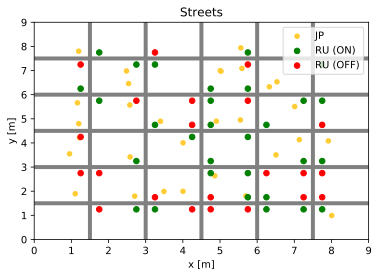

In [71]:
RU_DELTA = 0.25
JP_MIN_DELTA = 0.25
full_plot_line = np.arange(0, 10)

road0_y = np.array([3] * len(full_plot_line))
road0_x = np.array([3]  * len(full_plot_line))
road1_y = np.array([6] * len(full_plot_line))
road1_x = np.array([6]  * len(full_plot_line))


class RU:
    def __init__(self, x, y, active):
        self.x = x
        self.y = y
        self.active = active
        
class JP:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
def gen_ru(pairs):
    result = []
    for p in pairs:
        if (random.random() > 0.5):
            ru = RU(p[0] - RU_DELTA, p[1] - RU_DELTA, random.random() > 0.5)
            result.append(ru)
        if (random.random() > 0.5):
            ru = RU(p[0] + RU_DELTA, p[1] + RU_DELTA, random.random() > 0.5)
            result.append(ru)
        if (random.random() > 0.5):
            ru = RU(p[0] - RU_DELTA, p[1] + RU_DELTA, random.random() > 0.5)
            result.append(ru)
        if (random.random() > 0.5):
            ru = RU(p[0] + RU_DELTA, p[1] - RU_DELTA, random.random() > 0.5)
            result.append(ru)
       
    return result

def gen_jp(pairs):
    result = []
    for p in pairs:
        if (random.random() > 0.5):
            sign1 = [-1,1][random.randrange(2)]
            sign2 = [-1,1][random.randrange(2)]
            JP_DELTA = JP_MIN_DELTA + random.uniform(0.0, 0.3)
            jp = JP(p[0]  + sign1 *  JP_DELTA, p[1] + sign2 *JP_DELTA)
            result.append(jp)
        if (random.random() > 0.5):
            sign1 = [-1,1][random.randrange(2)]
            sign2 = [-1,1][random.randrange(2)]
            JP_DELTA = JP_MIN_DELTA + random.uniform(0.0, 0.3) 
            jp = JP(p[0] + sign1 * JP_DELTA, p[1] + sign2 * JP_DELTA)
            result.append(jp)
    return result        

def cross_road_generator(count, grid_size = 9):
    place = grid_size / (count + 1)
    cross_points = []
    draw_result = []
    
    for r in range(count):
        draw_result.append([full_plot_line, np.array([place + place * r] * len(full_plot_line))])
        draw_result.append([np.array([place + place * r] * len(full_plot_line)), full_plot_line])
        cross_points.append(place + place * r)

    return [draw_result, [[p1, p2] for p1 in cross_points for p2 in cross_points]]

#####################################################################################



def draw_ru(ru, ax):
    x = []
    y = []
    i_x = []
    i_y = []
    for r in ru:
        if r.active:
            x.append(r.x)
            y.append(r.y)
        else:
            i_x.append(r.x)
            i_y.append(r.y)
    
    ax.scatter(x, y, s=np.pi*10, c = "green", label="RU (ON)")
    ax.scatter(i_x, i_y, s=np.pi*10, c = "red", label="RU (OFF)")
        
def draw_jp(jp, ax):
    JP_COLOR = "#FFCC33"
    x = []
    y = []
    for j in jp:
        x.append(j.x)
        y.append(j.y)
    
    ax.scatter(x, y, s=np.pi*10, c = JP_COLOR, label="JP",  edgecolors='none')
    
def draw_roads(cx, ax):
    for ro in cx:
        ax.plot(ro[0], ro[1], color='gray', linewidth=4)
        
def draw_current_state(c_x, J, R):
    fig, ax = plt.subplots()

    plt.axis([0, 9, 0, 9])

    draw_roads(c_x,  ax)
    draw_jp(J, ax)
    draw_ru(R, ax)
    
    ax.set(xlabel='x [m]', ylabel='y [m]',
       title='Streets')


    fig.savefig("streets.png")
    ax.legend()
    plt.show()
    



res = cross_road_generator(5)
cx =  res[0]
pairs = res[1]
JP_LIST = gen_jp(pairs)
RU_LIST = gen_ru(pairs)


    
draw_current_state(cx, JP_LIST,  RU_LIST)



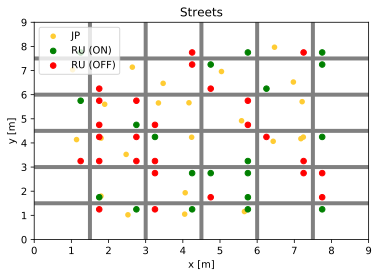

In [72]:

JP_LIST = gen_jp(pairs)
RU_LIST = gen_ru(pairs)
draw_current_state(cx, JP_LIST,  RU_LIST)

# 2. DU Relocation

Let $x_{jt}$ is binary variable (0 or 1) that represent state of DU connection for *j*th JP at  *t*th perion

$X(t) =  \{x_{1t}, x_{2t}, \dots \}$ - denotes state of DU connection for JPs at state t

The relocation DUs is described as a transition between the states using $X(t)$ 